**CREDIT CARD FRAUD DETECTION**
Codsoft Internship

Author : Yashodeep Vijay Wankhede

Batch :January(Batch A1)

Domain : Data Science

Build a machine learning model to identify fraudulent credit card transactions. Preprocess and normalize the transaction data, handle class imbalance issues, and split the dataset into training and testing sets.
Train a classification algorithm, such as logistic regression or random forests, to classify transactions as fraudulent or genuine.
Evaluate the model's performance using metrics like precision, recall, and F1-score, and consider techniques like oversampling or undersampling for improving results.
**Here's a high-level overview of what you can do:**


1. Data Collection:

Gather a comprehensive dataset containing historical credit card transactions. This dataset should include features like transaction amount, time,V1 .. V28 and whether the transaction was fraudulent or not i.e Class.


2. Data Preprocessing:


*  Handle missing data, outliers, and duplicate records.
*  Encode categorical variables and normalize numerical features.
*Split the data into training and testing sets to evaluate model performance.

3.Exploratory Data Analysis (EDA):
* Visualize the data to understand its distribution and characteristics.
* Identify patterns, trends, and potential anomalies in legitimate and fraudulent transactions.

4.Model Selection:
* Choose appropriate machine learning algorithms for fraud detection. Common choices include:
    * Logistic Regression
    * Decision Trees
    * Random Forest ✅
    * Support Vector Machines
5. Model Training:
* Train the selected models on the training data.
* Implement techniques to handle class imbalance (fraudulent transactions are often rare compared to legitimate ones)

6. Model Evaluation:
* Evaluate model performance using metrics like accuracy, precision, recall, F1-score, and ROC AUC.
* Consider the business impact of false positives and false negatives in your evaluation.





## 1. **Data Collection**

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
credit_data = pd.read_csv("/content/creditcard.csv")
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
credit_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
25833,33785,-0.187402,0.445507,2.199225,3.030535,-0.361376,1.095100,-0.119594,0.245950,-0.371890,...,0.154001,0.813468,0.377732,0.201209,-1.671394,-0.064077,0.067891,0.021521,42.33,0.0
25834,33785,1.237064,0.312096,0.191934,0.496764,-0.129777,-0.551625,-0.007160,-0.048880,-0.240393,...,-0.255114,-0.759423,0.072774,-0.035961,0.238605,0.096858,-0.025772,0.017772,1.79,0.0
25835,33785,1.245292,-0.594493,0.275982,-0.578346,-0.920599,-0.865570,-0.321689,-0.217249,-1.007295,...,0.303333,0.736260,-0.102900,0.452253,0.510125,-0.114928,0.003129,0.021850,70.75,0.0
25836,33787,-0.697373,0.401180,0.803750,-1.015524,-0.226100,0.283660,0.094868,0.077613,-1.327124,...,0.118688,0.467655,-0.162958,-0.703390,-0.174347,-0.202938,-0.369636,-0.152421,49.95,0.0
25837,33787,1.303469,0.498450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
credit_data.shape

(25838, 31)

In [ ]:
# informtion of dataset
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25838 entries, 0 to 25837
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    25838 non-null  int64  
 1   V1      25838 non-null  float64
 2   V2      25838 non-null  float64
 3   V3      25837 non-null  float64
 4   V4      25837 non-null  float64
 5   V5      25837 non-null  float64
 6   V6      25837 non-null  float64
 7   V7      25837 non-null  float64
 8   V8      25837 non-null  float64
 9   V9      25837 non-null  float64
 10  V10     25837 non-null  float64
 11  V11     25837 non-null  float64
 12  V12     25837 non-null  float64
 13  V13     25837 non-null  float64
 14  V14     25837 non-null  float64
 15  V15     25837 non-null  float64
 16  V16     25837 non-null  float64
 17  V17     25837 non-null  float64
 18  V18     25837 non-null  float64
 19  V19     25837 non-null  float64
 20  V20     25837 non-null  float64
 21  V21     25837 non-null  float64
 22

# **2. Data Processing**

In [ ]:
# Check null values
credit_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,1
V4,1
V5,1
V6,1
V7,1
V8,1
V9,1


**No Null values present**

In [ ]:
credit_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,25838.000000,25838.000000,25838.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,...,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000
mean,19376.128532,-0.225653,0.166976,0.723131,0.229368,-0.194354,0.079800,-0.128669,0.026060,0.441922,...,-0.037598,-0.132262,-0.039778,0.011174,0.129413,0.023418,0.013306,0.004153,75.808937,0.003406
std,11653.899424,1.889055,1.552796,1.684909,1.434242,1.436206,1.323018,1.319114,1.341622,1.269785,...,0.817316,0.641426,0.538789,0.590048,0.436213,0.516670,0.397674,0.280120,219.661154,0.058262
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,0.000000
25%,7694.750000,-0.951266,-0.405158,0.279675,-0.683788,-0.779682,-0.662365,-0.594982,-0.164442,-0.384700,...,-0.249309,-0.552080,-0.173949,-0.325263,-0.133337,-0.338941,-0.065269,-0.008898,6.060000,0.000000
50%,22684.000000,-0.267973,0.176509,0.862364,0.204882,-0.224921,-0.179636,-0.067756,0.029393,0.358908,...,-0.097962,-0.106938,-0.049040,0.063000,0.167170,-0.052787,0.007047,0.019985,18.960000,0.000000
75%,30231.500000,1.166499,0.818206,1.489349,1.109950,0.320600,0.466671,0.446339,0.287518,1.200785,...,0.072314,0.276513,0.075082,0.399042,0.410283,0.306226,0.091845,0.076753,67.610000,0.000000
max,33787.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,13.876221,4.014444,5.525093,3.517346,11.135740,4.860769,7879.420000,1.000000


### **3. EDA(Exploratory Data Analysis)**

In [ ]:
# Number of columns
credit_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# Unique value in class columns
credit_data.Class.unique()

array([ 0.,  1., nan])

**Class Columns has two values i.e 0 & 1 where 1 is Fraud Case and 0 is Valid case.**

**Determine Number of fraud cases in the dataset**



In [ ]:
fraud_case = credit_data[credit_data['Class'] == 1]
valid_case = credit_data[credit_data['Class'] == 0]

print(f"Number of Fraud Case: {len(fraud_case)}")
print(f"Number of Valid Case: {len(valid_case)}")

total =  len(fraud_case) / len(valid_case)
total

Number of Fraud Case: 88
Number of Valid Case: 25749


0.0034176084508136238

In [ ]:
per = len(fraud_case) / len(credit_data['Class']) * 100
per

0.3405836365043734

:: Only 0.34% transaction is fraudlent

### **Class Distrubtion**

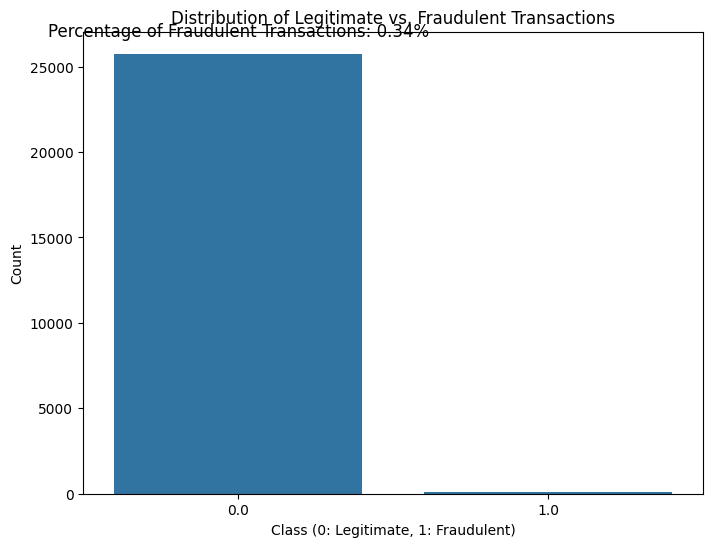

In [ ]:
# Count the number of occurrences for each class (0 for legitimate, 1 for fraudulent)
class_counts = credit_data['Class'].value_counts()

# Calculate the percentage of fraudulent transactions
percentage_fraudulent = (class_counts[1] / class_counts.sum()) * 100

plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=credit_data)
plt.title('Distribution of Legitimate vs. Fraudulent Transactions')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Count')

# Display the percentage of fraudulent transactions on the plot
plt.text(0, class_counts[0] + 1000, f'Percentage of Fraudulent Transactions: {percentage_fraudulent:.2f}%', fontsize=12, ha='center')

plt.show()

### **Time Analysis**

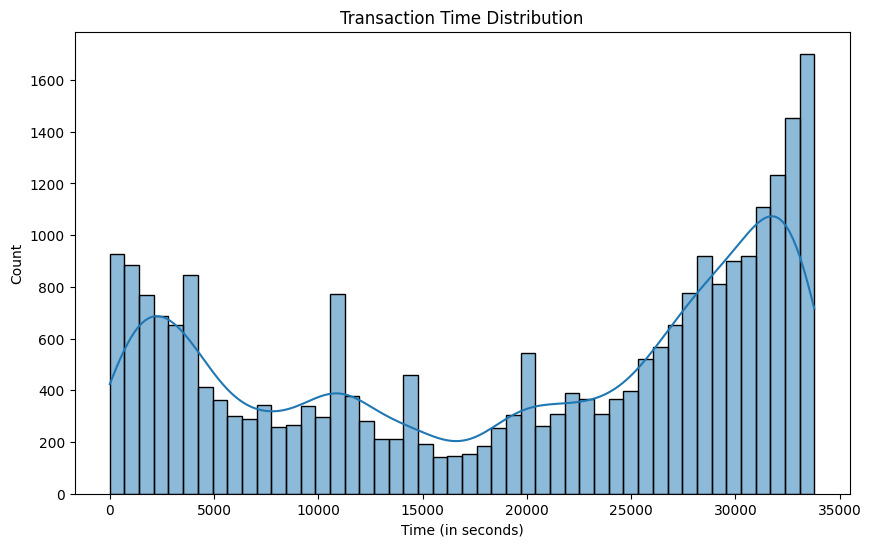

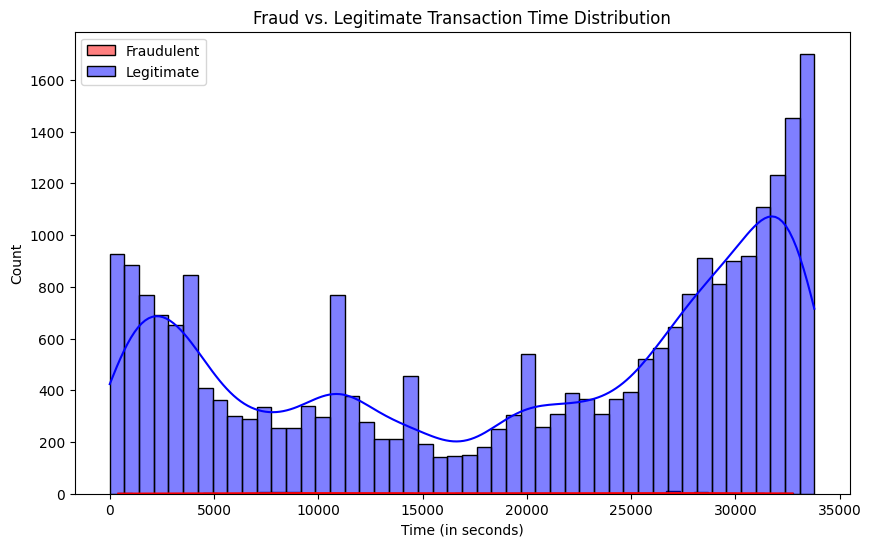

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(credit_data['Time'], bins=48, kde=True)  # Using 48 bins for a daily view
plt.title('Transaction Time Distribution')
plt.xlabel('Time (in seconds)')
plt.ylabel('Count')

# Check if there are specific times of day when fraud is more likely to occur
plt.figure(figsize=(10, 6))
sns.histplot(credit_data[credit_data['Class'] == 1]['Time'], bins=48, kde=True, color='red', label='Fraudulent')
sns.histplot(credit_data[credit_data['Class'] == 0]['Time'], bins=48, kde=True, color='blue', label='Legitimate')
plt.title('Fraud vs. Legitimate Transaction Time Distribution')
plt.xlabel('Time (in seconds)')
plt.ylabel('Count')
plt.legend()

plt.show()

## **Transaction Amount Analysis**

In [ ]:
# Calculate summary statistics for both groups
legitimate_summary = legitimate_transactions.describe()
fraudulent_summary = fraudulent_transactions.describe()

print("Summary Statistics for Legitimate Transactions:")
print(legitimate_summary)
print("\nSummary Statistics for Fraudulent Transactions:")
print(fraudulent_summary)

NameError: name 'legitimate_transactions' is not defined

In [ ]:
# Assuming `credit_data` is your loaded dataset and 'Class' column indicates fraud (1) or legitimate (0)
legitimate_transactions = credit_data[credit_data['Class'] == 0]
fraudulent_transactions = credit_data[credit_data['Class'] == 1]

# Calculate summary statistics for both groups
legitimate_summary = legitimate_transactions.describe()
fraudulent_summary = fraudulent_transactions.describe()

print("Summary Statistics for Legitimate Transactions:")
print(legitimate_summary)

print("\nSummary Statistics for Fraudulent Transactions:")
print(fraudulent_summary)


Summary Statistics for Legitimate Transactions:
               Time            V1            V2            V3            V4  \
count  25749.000000  25749.000000  25749.000000  25749.000000  25749.000000   
mean   19380.491087     -0.197045      0.145743      0.767372      0.208854   
std    11662.244413      1.734655      1.485498      1.394098      1.382907   
min        0.000000    -28.344757    -40.978852    -27.747084     -5.172595   
25%     7673.000000     -0.945115     -0.408337      0.284464     -0.687480   
50%    22722.000000     -0.264220      0.172738      0.865810      0.200665   
75%    30239.000000      1.167064      0.810197      1.492085      1.100325   
max    33787.000000      1.960497     14.845545      4.101716     13.143668   

                 V5            V6            V7            V8            V9  \
count  25749.000000  25749.000000  25749.000000  25749.000000  25749.000000   
mean      -0.174420      0.088572     -0.100712      0.011278      0.453641   
std

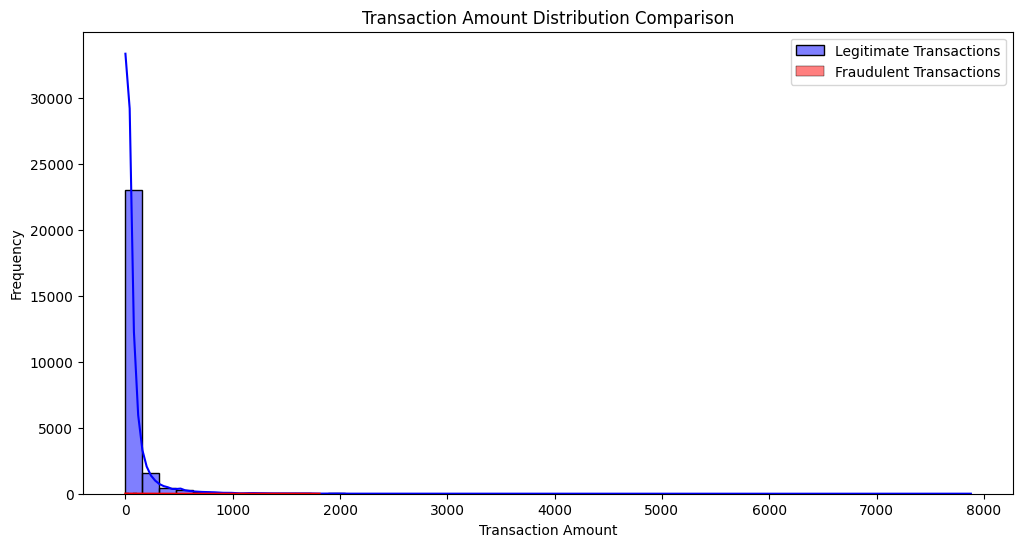

In [ ]:
# Separate data for legitimate and fraudulent transactions
legitimate_transactions = credit_data[credit_data['Class'] == 0]['Amount']
fraudulent_transactions = credit_data[credit_data['Class'] == 1]['Amount']

plt.figure(figsize=(12, 6))
sns.histplot(legitimate_transactions, color='blue', kde=True, label='Legitimate Transactions', bins=50)
sns.histplot(fraudulent_transactions, color='red', kde=True, label='Fraudulent Transactions', bins=50)

plt.title('Transaction Amount Distribution Comparison')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()

plt.show()

## **Feature Correlation**

            Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000  0.013667 -0.078403 -0.080129 -0.022251 -0.080720 -0.040854   
V1      0.013667  1.000000 -0.208936  0.364763 -0.120838  0.149107  0.117659   
V2     -0.078403 -0.208936  1.000000 -0.320466  0.134059 -0.185629 -0.034789   
V3     -0.080129  0.364763 -0.320466  1.000000 -0.180986  0.360776  0.035454   
V4     -0.022251 -0.120838  0.134059 -0.180986  1.000000 -0.104786 -0.047663   
V5     -0.080720  0.149107 -0.185629  0.360776 -0.104786  1.000000  0.111517   
V6     -0.040854  0.117659 -0.034789  0.035454 -0.047663  0.111517  1.000000   
V7     -0.025640  0.232276 -0.110147  0.414381 -0.142927  0.129479  0.112464   
V8      0.045254 -0.147159  0.081638 -0.342943  0.112733 -0.168941 -0.095343   
V9     -0.272484 -0.018112 -0.051550  0.183122 -0.072956  0.042820  0.054511   
V10     0.086554  0.041345 -0.023367  0.236887 -0.097708  0.181529  0.065981   
V11    -0.143050 -0.053374  0.113361 -0.

<ipython-input-21-287aac974b56>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=highly_correlated_features.index, y=highly_correlated_features.values, palette='viridis')


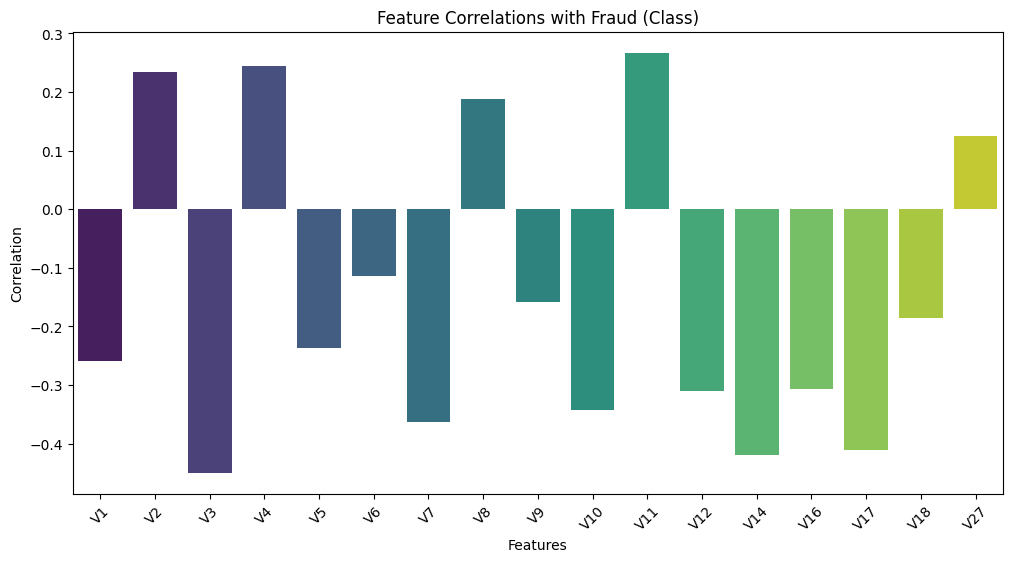

In [ ]:
# Calculate the correlation matrix
correlation_matrix = credit_data.corr()
print(correlation_matrix)

# Filter the correlations of features with the target variable ('Class')
feature_correlations = correlation_matrix['Class'].drop('Class')
print(feature_correlations)

correlation_threshold = 0.1

highly_correlated_features = feature_correlations[abs(feature_correlations) > correlation_threshold]

plt.figure(figsize=(12, 6))
sns.barplot(x=highly_correlated_features.index, y=highly_correlated_features.values, palette='viridis')
plt.title('Feature Correlations with Fraud (Class)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)

plt.show()

**Transaction Amount vs. Time:**
* Plot a scatter plot to examine the relationship between transaction amount and time.

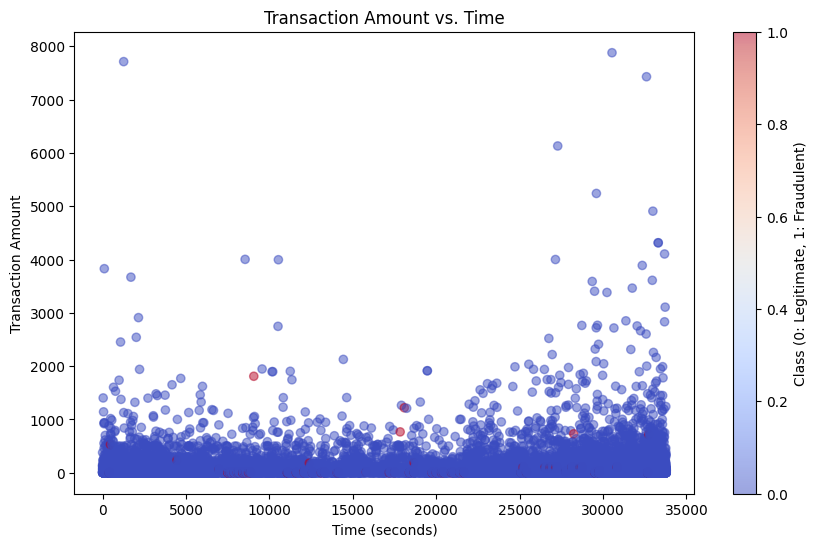

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(credit_data['Time'], credit_data['Amount'], c=credit_data['Class'], cmap='coolwarm', alpha=0.5)
plt.title('Transaction Amount vs. Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Transaction Amount')
plt.colorbar(label='Class (0: Legitimate, 1: Fraudulent)')

plt.show()

## **Visualize Heatmap for correlation matrix between features.**

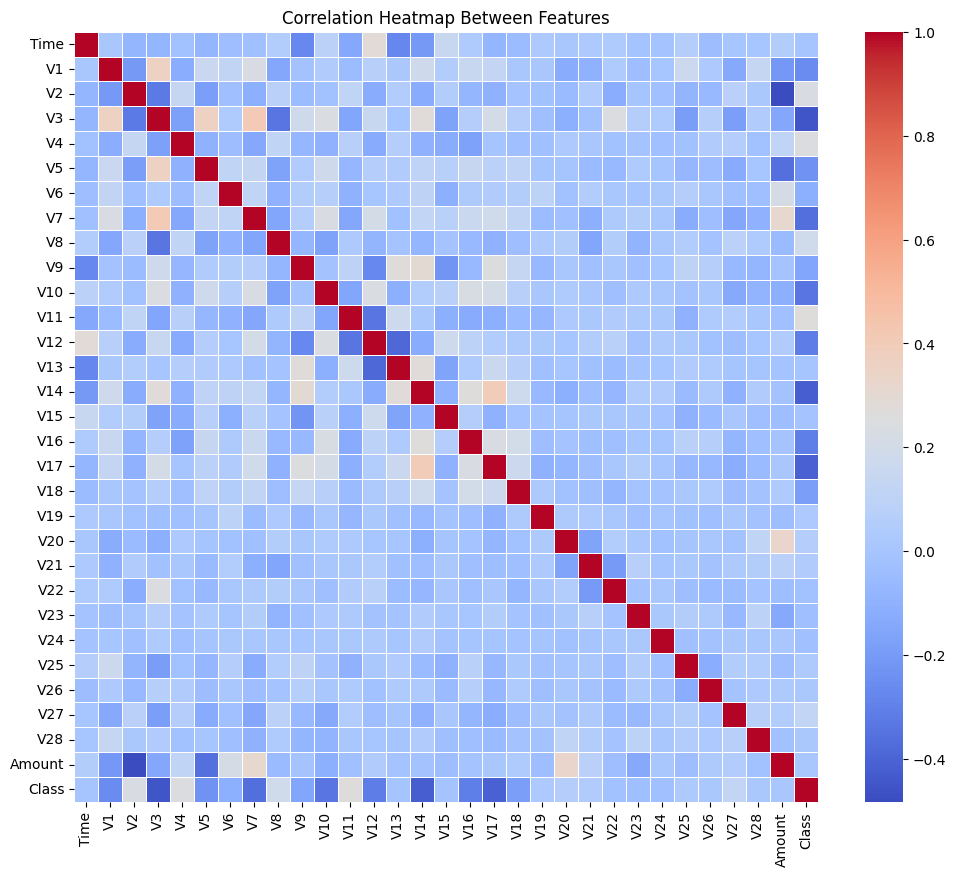

In [ ]:
correlation_matrix = credit_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap Between Features')
plt.show()

## **4. Developing Model**

In [ ]:

# import libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix)

**Defined X and Y**

In [ ]:
# Test value
X = credit_data.drop(['Class'], axis=1)
# Target value
Y = credit_data['Class']

print(f"value and shapes : {X.values,X.shape}")
print(f"value and shapes : {Y.values,Y.shape}")

value and shapes : (array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 3.37850000e+04,  1.24529237e+00, -5.94492990e-01, ...,
         3.12856493e-03,  2.18500616e-02,  7.07500000e+01],
       [ 3.37870000e+04, -6.97373322e-01,  4.01179822e-01, ...,
        -3.69636432e-01, -1.52421097e-01,  4.99500000e+01],
       [ 3.37870000e+04,  1.30346858e+00,  4.98450000e-01, ...,
                    nan,             nan,             nan]]), (25838, 30))
value and shapes : (array([ 0.,  0.,  0., ...,  0.,  0., nan]), (25838,))


**Spliting the data for training and Testing**

In [ ]:
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

# **Building Model**

* **Random Forest is a popular choice for fraud detection because it can handle imbalanced datasets and capture complex relationships between features. We can further tune hyperparameters or explore feature importance to enhance the model's performance and interpretability.**

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train,Y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [ ]:
print(y_pred)
print(Y_test)

[0. 0. 0. ... 0. 0. 0.]
10906    0.0
10658    0.0
9500     0.0
16799    0.0
10324    0.0
        ... 
8295     0.0
15289    0.0
2267     0.0
3929     0.0
7303     0.0
Name: Class, Length: 5168, dtype: float64


## **6. Model Evaluation**

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(Y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:392: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y_true contains NaN.

In [ ]:
print(Y_test.isnull().sum())


1


In [ ]:
Y_test = Y_test.dropna()


ValueError: Found input variables with inconsistent numbers of samples: [5167, 5168]